# Effects of Loan Features on Loan's Status Outcome
## by Khoo Kian Chong

## Investigation Overview

In this investigation, I wanted to look at the features of loan that could be helpful in predicting loan's status outcome. The two main features are loan amount and annual percentage rate.

## Dataset Overview

There are 113937 loans in Prosper Loan dataset with 81 features. Out of the 81 features, 10 features are selected for analysis and visualization. The following list shows the selected 10 features.

<ul>
    <li>Term</li>
    <li>BorrowerAPR</li>
    <li>ProsperScore</li>
    <li>EmploymentStatus</li>
    <li>EmploymentStatusDuration</li>
    <li>DebtToIncomeRatio</li>
    <li>StatedMonthlyIncome</li>
    <li>IncomeVerifiable</li>
    <li>MonthlyLoanPayment</li>
    <li>LoanOriginalAmount</li>
    <li>LoanStatus</li>
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

# Define columns of interest used for predicting loan status
cols_to_keep = ['Term', 'ProsperScore', 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio',
               'StatedMonthlyIncome', 'IncomeVerifiable', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'LoanStatus']

loan = loan[cols_to_keep]

In [3]:
# Replace 'Not available' in 'EmploymentStatus' column with NaN
loan.EmploymentStatus.replace('Not available', np.nan, inplace=True)

# Categorize all different types of 'PastDue' (Past Due (16-30 days), Past Due (31-60 days) and etc) into 'PastDue'
loan.LoanStatus = loan.LoanStatus.apply(lambda x: 'Past Due' if 'Past Due' in x else x)

# Remove rows with NaN value in any of the column
loan = loan[~loan.isnull().any(axis=1)]

# Remove rows that correspond to extremely high stated monthly income (>30000)
loan = loan[loan.StatedMonthlyIncome <= 30000]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Amount
A large large proportion of original loan amounts take on values of roughly 4000, 10000, 15000, 20000 and 25000, with gradually decreasing frequencies until the next peak is reached.

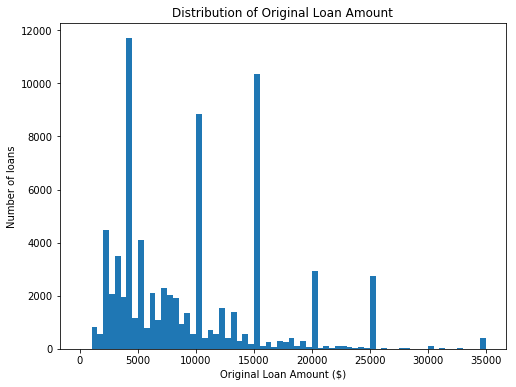

In [4]:
# Plot standard-scaled histogram for LoanOriginalAmount
binsize = 500
bins = np.arange(0, loan.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Number of loans');

## Distribution of Annual Percentage Rate

Annual percentage rates of the loans in the dataset take on values from about 0.05 to 0.45. The distribution looks roughly bimodal, with one peak a little below 0.2, and a second sharp and high peak between 0.25 and 0.3

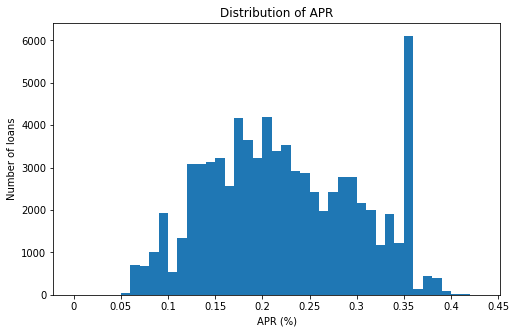

In [5]:
# Plot standard-scaled histogram for BorrowerAPR
binsize = 0.01
bins = np.arange(0, loan.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.title('Distribution of APR')
plt.xlabel('APR (%)')
plt.ylabel('Number of loans')
xticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
plt.xticks(xticks, xticks);

## Boxplot of Loan Status vs Loan Amount
Defaulted or charged-off loans have lower loan amount, whereas loans that are currently ongoing have higher loan amount.  This suggests that Prosper is increasing the amount of loan given to the borrowers recently.

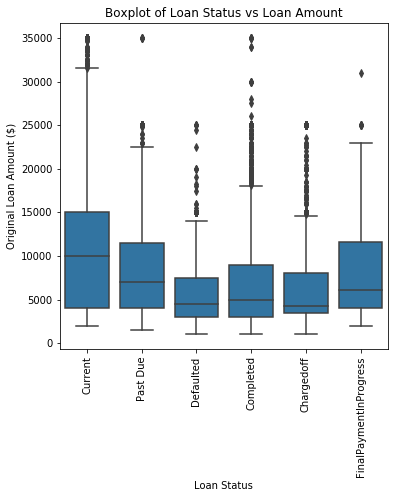

In [6]:
default_color = sb.color_palette()[0]
# Plot boxplot to study the correlation between LoanOriginalAmount and LoanStatus 
plt.figure(figsize = [20, 6])
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data=loan, x='LoanStatus', y='LoanOriginalAmount', color = default_color)
plt.title('Boxplot of Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Original Loan Amount ($)')
plt.xticks(rotation=90);

## Boxplot of Loan Status vs Annual Percentage Rate (APR)
Defaulted and charged-off loans have higher APR than other loan's outcome status. Loans that are currently ongoing or in final payment process have lower APR.

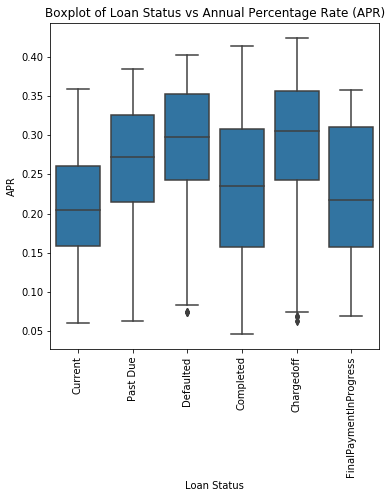

In [7]:
default_color = sb.color_palette()[0]
# Plot boxplot to study the correlation between BorrowerAPR and LoanStatus 
plt.figure(figsize = [20, 6])
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data=loan, x='LoanStatus', y='BorrowerAPR', color = default_color)
plt.title('Boxplot of Loan Status vs Annual Percentage Rate (APR)')
plt.xlabel('Loan Status')
plt.ylabel('APR')
plt.xticks(rotation=90);